# 一、项目背景
通过"扫描"零售商店电子销售点个别产品的条形码而获得的消费品销售的详细数据。这些数据提供了有关所售商品的数量、特征和价值以及价格的详细信息。

# 二、数据来源
https://www.kaggle.com/marian447/retail-store-sales-transactions

# 三、提出问题
- 消费情况分析及用户购买模式分析
- RFM和CLV分析
- 不同类别商品关联规则挖掘

# 四、理解数据
- Date：购买日期
- Customer_ID：用户ID
- Transaction_ID：交易ID
- SKU_Category：商品分类SKU编码
- SKU：商品唯一SKU编码
- Quantity：购买数量
- Sales_Amount：购买金额

# 五、数据清洗
## 1.导入数据

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
# 更改设计风格
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']

In [5]:
df = pd.read_csv('./scanner_data.csv')
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


## 2.选择子集
第一列为数据编号，已有索引故删除

In [8]:
df.drop(columns='Unnamed: 0', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            131706 non-null  object 
 1   Customer_ID     131706 non-null  int64  
 2   Transaction_ID  131706 non-null  int64  
 3   SKU_Category    131706 non-null  object 
 4   SKU             131706 non-null  object 
 5   Quantity        131706 non-null  float64
 6   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 7.0+ MB


## 3.删除重复值

In [9]:
df.duplicated().sum()

0

## 4. 缺失值处理

In [10]:
df.isnull().sum()

Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64

## 5. 标准化处理

In [11]:
df.dtypes

Date               object
Customer_ID         int64
Transaction_ID      int64
SKU_Category       object
SKU                object
Quantity          float64
Sales_Amount      float64
dtype: object

Date为对象类型，需要标准化为日期类型格式

In [18]:
df.Date = pd.to_datetime(df.Date, format="%d/%m/%Y")
df.dtypes

Date              datetime64[ns]
Customer_ID                int64
Transaction_ID             int64
SKU_Category              object
SKU                       object
Quantity                 float64
Sales_Amount             float64
dtype: object

## 6. 异常值处理

In [20]:
df[['Quantity','Sales_Amount']].describe()

,Quantity,Sales_Amount
count,131706.000000,131706.000000
mean,1.485311,11.981524
std,3.872667,19.359699
min,0.010000,0.020000
25%,1.000000,4.230000
50%,1.000000,6.920000
75%,1.000000,12.330000
max,400.000000,707.730000


购买数量存在小于1是由于称重单位不足1所致，非异常值

# 六、分析内容
## 1.消费情况按月分析
（1）每月消费总金额趋势分析

In [22]:
df['Month'] = df.Date.astype('datetime64[M]')
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Month
0,2016-01-02,2547,1,X52,0EM7L,1.0,3.13,2016-01-01
1,2016-01-02,822,2,2ML,68BRQ,1.0,5.46,2016-01-01
2,2016-01-02,3686,3,0H2,CZUZX,1.0,6.35,2016-01-01
3,2016-01-02,3719,4,0H2,549KK,1.0,5.59,2016-01-01
4,2016-01-02,9200,5,0H2,K8EHH,1.0,6.88,2016-01-01


In [23]:
grouped_month = df.groupby('Month')

In [24]:
grouped_month.Sales_Amount.sum()

Month
2016-01-01    111200.28
2016-02-01    122114.61
2016-03-01    127924.54
2016-04-01    138172.11
2016-05-01    142719.86
2016-06-01    131305.35
2016-07-01    120591.97
2016-08-01    116908.98
2016-09-01    141239.89
2016-10-01    140853.51
2016-11-01    132883.33
2016-12-01    152124.19
Name: Sales_Amount, dtype: float64

In [ ]:
2018年1月数据可能统计不全，不纳入趋势分析

<AxesSubplot:xlabel='Month'>

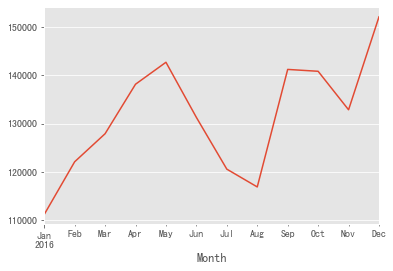

In [25]:
grouped_month.Sales_Amount.sum().head(12).plot()

- 由上图可知：消费金额波动较大，其中第一季度保持持续上升，后续波动较大，整体呈上升趋势

（2）每月交易次数趋势分析

<AxesSubplot:xlabel='Month'>

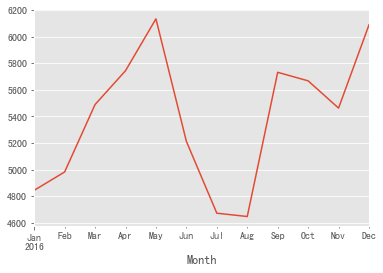

In [26]:
grouped_month.Transaction_ID.nunique().head(12).plot()

- 由上图可知：交易次数波动较大，前期呈上升趋势，五月之后交易次数开始下降，在八月降至最低值，后续开始波动回升，在十二月份重回峰值

（3）每月商品购买数量趋势分析

<AxesSubplot:xlabel='Month'>

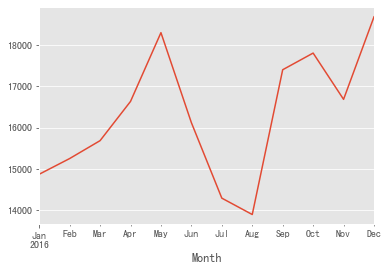

In [28]:
grouped_month.Quantity.sum().head(12).plot()

由上图可知：商品购买数量波动较大，整体趋势同交易次数保持一致

（4）每月消费人数趋势分析

<AxesSubplot:xlabel='Month'>

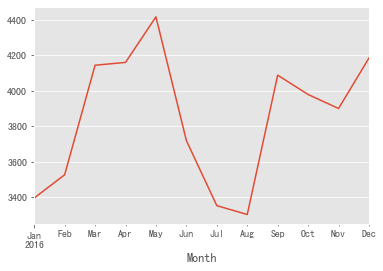

In [29]:
grouped_month.Customer_ID.nunique().head(12).plot()

由上图可知：每月购买人数可分简单为三个阶段，1-5月呈持续上升趋势，6—8呈持续下降趋势，9-12月呈波动上升趋势

## 2.用户分布分析
（1）新用户分布

<AxesSubplot:>

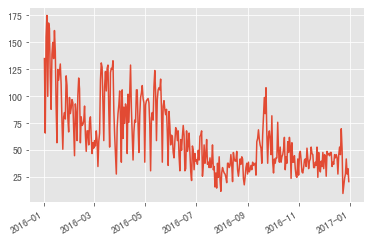

In [77]:
grouped_customer = df.groupby('Customer_ID')
grouped_customer.Date.min().value_counts().plot()

由上图可知：新用户获取不稳定，波动较大，整体有略微下降趋势

<AxesSubplot:>

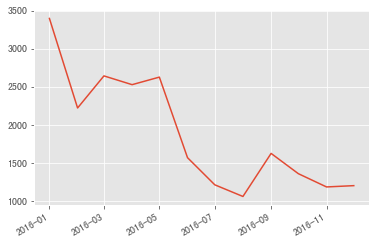

In [68]:
grouped_customer.Month.min().value_counts().plot()

- 由上图可知：按月统计，每月新用户用户数有明显下降趋势。说明新用户获取呈大幅下降趋势，需要引起注意，适当增加营销活动提升新用户的获取


(2) 一次消费及多次消费用户占比分析

In [34]:
#仅消费一次用户占比
(grouped_customer.Transaction_ID.nunique() == 1).sum()/df.Customer_ID.nunique()

0.5098342541436464

- 由计算得：存在一半的用户只进行了一次消费

In [78]:
grouped_month_customer = df.groupby(['Month', 'Customer_ID'])

In [79]:
#每个用户每月的第一次购买时间
data_month_min_date = grouped_month_customer.Date.min().reset_index()
#每个用户的第一次购买时间
data_min_date = grouped_customer.Date.min().reset_index()

In [80]:
#通过Customer_ID联立两表
merged_date = pd.merge(data_month_min_date, data_min_date, on='Customer_ID')
merged_date.head()

,Month,Customer_ID,Date_x,Date_y
0,2016-01-01,1,2016-01-22,2016-01-22
1,2016-01-01,3,2016-01-02,2016-01-02
2,2016-01-01,11,2016-01-29,2016-01-29
3,2016-01-01,12,2016-01-07,2016-01-07
4,2016-01-01,13,2016-01-11,2016-01-11


<AxesSubplot:xlabel='Month'>

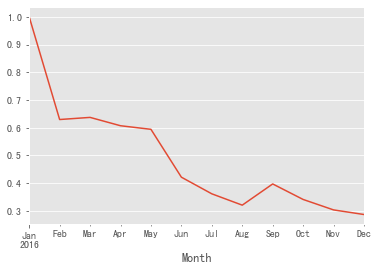

In [81]:
#Date_x等于Date_y则为每月新用户
((merged_date.query('Date_x == Date_y')).groupby('Month').Customer_ID.count() / merged_date.groupby('Month').Customer_ID.count()).plot()

- 由上图可知：每月新用户占比整体呈下降趋势，结合每月消费人数趋势可知，第四季度消费人数有上升趋势，故期间复购人数有所提升

## 3.用户分层分析
（1）RFM分层分析

In [87]:
pivot_rfm = df.pivot_table(index='Customer_ID',
              values=['Date', 'Transaction_ID', 'Sales_Amount'],
              aggfunc={'Date':'max', 'Transaction_ID':'nunique', 'Sales_Amount':'sum'})
pivot_rfm

,Date,Sales_Amount,Transaction_ID
Customer_ID,,,
1,2016-01-22,16.29,1
2,2016-06-19,22.77,2
3,2016-01-02,10.92,1
4,2016-11-09,33.29,2
5,2016-07-05,78.82,5
...,...,...,...
22621,2016-12-10,9.69,1
22622,2016-12-16,6.07,1
22623,2016-12-21,128.01,1


In [83]:
pivot_rfm['R'] = (pivot_rfm.Date.max() - pivot_rfm.Date)/np.timedelta64(1, 'D')
pivot_rfm.rename(columns={'Transaction_ID':'F', 'Sales_Amount':'M'}, inplace=True)

In [84]:
def label_func(data):
    label = data.apply(lambda x:'1' if x > 0 else '0')
    label = label.R + label.F + label.M
    labels = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }
    return labels[label]
pivot_rfm['label'] = pivot_rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(label_func, axis=1)

<AxesSubplot:>

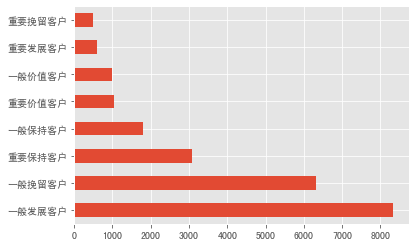

In [85]:
pivot_rfm.label.value_counts().plot.barh()

<AxesSubplot:ylabel='M'>

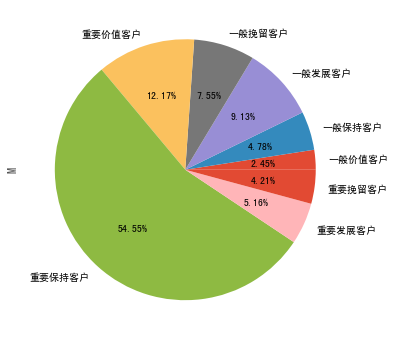

In [86]:
pivot_rfm.groupby('label').M.sum().plot.pie(figsize=(6,6), autopct='%3.2f%%')

In [44]:
pivot_rfm.groupby('label').agg(['sum', 'count'])

M            F                R      
              sum count    sum count        sum count
label                                                
一般价值客户   38702.46   991   3653   991   258396.0   991
一般保持客户   75475.62  1802   7161  1802    97961.0  1802
一般发展客户  144065.48  8329  10089  8329  2256955.0  8329
一般挽留客户  119097.65  6313   8158  6313   443616.0  6313
重要价值客户  192090.11  1028   5475  1028   270431.0  1028
重要保持客户  860862.51  3069  28458  3069   120487.0  3069
重要发展客户   81377.67   600    892   600   162986.0   600
重要挽留客户   66367.12   493    796   493    33989.0   493

由上表及图可知：

- 销售额主要来源重要保持客户，人数占比最高的为一般发展客户
- 重要保持客户：销售额的主要来源，近期有消费，且消费高，消费频率不足，可以适当举行营销活动，提升此层客户的购买频率
- 重要价值客户：销售额的第二来源，近期有消费，消费高，频率高，尽可能使该层客户保持现状
- 重要发展客户：消费以及消费频次高，近期没有消费，可以使用适当策略召回用户，参与消费
- 重要挽留客户：消费高，但频次低且近期未消费，处在流失的边缘，可以通过适当活动，使其参与到消费中来，防止流失
- 一般价值客户：消费低，消费频率高且近期有消费，可以使用优惠券等形式活动刺激该层客户的消费，提升其消费额
- 一般发展客户：人数占比最高，近期有消费，但消费额以及消费频次不高，考虑到人数占比高，可以适当举办活动提升消费频次和消费额
- 一般保持客户：在成本与资源控制下，酌情考虑
- 一般挽留客户：在成本与资源控制下，酌情考虑

（2）用户状态分层分析

In [45]:
pivoted_status = df.pivot_table(index='Customer_ID', columns='Month', values='Date', aggfunc='count').fillna(0)

In [46]:
def active_status(data):
    status = []
    for i in range(len(data)):     
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        #若本月有消费
        else:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('new')
                elif status[i-1] == 'unactive':
                    status.append('return')
                else:
                    status.append('active')
            else:
                status.append('new')
    status = pd.Series(status, index = data.index)
    return status

In [47]:
active_status = pivoted_status.apply(active_status, axis=1)

<AxesSubplot:xlabel='Month'>

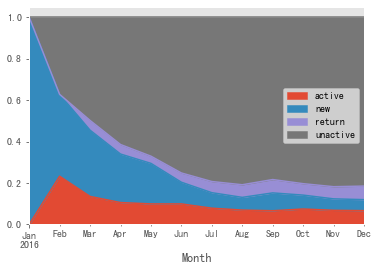

In [48]:
active_status.replace('unreg', np.nan).apply(lambda x:x.value_counts()).fillna(0).T.apply(lambda x: x/x.sum(),axis=1).plot.area()

由上图可知：
- 新用户：新用户占比呈明显下降趋势，说明拉新运营不足
- 活跃用户：在二月占比达到最高，后续呈缓慢下降趋势，说明消费运营正在下滑
- 不活跃用户：不活跃用户呈明显上升趋势，客户流失较为明显
- 回流客户：有缓慢上升趋势，说明召回运营不错

## 4.用户生命周期分析
（1）用户生命周期分布

In [49]:
#构成用户生命周期研究的数据样本需要消费次数>=2次的用户
clv = (grouped_customer[['Sales_Amount']].sum())[grouped_customer.Transaction_ID.nunique() > 1]

In [50]:
clv['lifetime'] = (grouped_customer.Date.max() - grouped_customer.Date.min())/np.timedelta64(1,'D')

In [51]:
clv.describe()

,Sales_Amount,lifetime
count,11090.000000,11090.000000
mean,121.473811,116.468260
std,202.733651,85.985488
min,2.240000,0.000000
25%,27.462500,42.000000
50%,55.635000,96.000000
75%,126.507500,190.000000
max,3985.940000,364.000000


- 由上表可知：消费一次以上的用户平均生命周期为116天，用户生命周期内平均消费金额为121.47元


<AxesSubplot:ylabel='Frequency'>

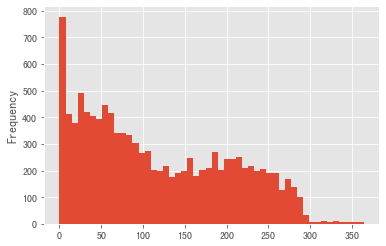

In [52]:
clv['lifetime'].plot.hist(bins = 50)

由上图可知：
- 生命周期在0-90天内的用户较多，说明生命周期短的客户占比较高，90天内流失率较高，此部分用户可以作为运营重点，延长这些用户的生命周期；
- 生命周期在90-250之间的分布较为均匀，这也是大多数用户的生命周期，可以刺激这些用户的消费，使其在生命周期内提升消费金额；
- 生命周期大于250天的人数极少，说明生命周期较长的忠诚客户占比不高。

（2）用户生命周期价值分布

<AxesSubplot:ylabel='Frequency'>

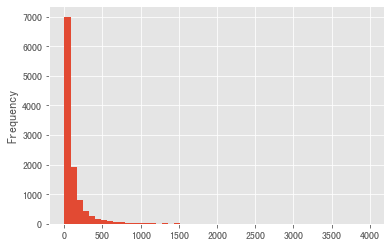

In [53]:
clv['Sales_Amount'].plot.hist(bins = 50)

由上图可知：

- 绝大部分用户生命周期内价值在500以内，且其中大部分在100以内，存在较大极值拉高均值，数据向右偏斜。

（3）用户生命周期及其价值相关关系

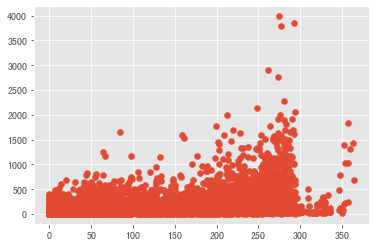

In [54]:
plt.scatter(x='lifetime', y='Sales_Amount', data=clv)

由上图可知：

- 用户生命周期与其期间客户价值不存在线性关系，当生命周期在300天内，部分生命周期较长用户贡献的价值高于生命周期较短的用户；
- 当生命周期大于300天，存在部分用户贡献价值较少，由于数据量不足等原因，结果仅供参考

## 5.回购率与复购率分析¶
(1) 复购率分析

<AxesSubplot:xlabel='Month'>

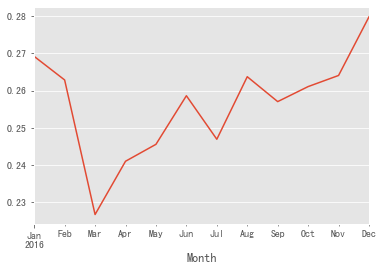

In [55]:
#每月消费次数大于1的用户数
customer_month_again = grouped_month_customer.nunique().query('Transaction_ID > 1').reset_index().groupby('Month').count().Customer_ID
#每月消费用户数
customer_month = grouped_month.Customer_ID.nunique()
#每月复购率
(customer_month_again/customer_month).plot()

- 由上图可知：复购率在25%上下浮动，说明每月有25%的用户会进行多次消费；前三个月的复购率有所下降，后续有所回升，整体有上升趋势，应结合本身商务模式，决定进一步提升复购率还是注重新用户的获取。最后一月由于数据量不足，结果以真实数据为主。

（2）回购率分析

In [56]:
#  1表示前90天消费且本月回购  0表示前90天消费本月未回购  nan表示前90天未消费
def buy_back(data):
    status = [np.nan,np.nan,np.nan]
    for i in range(3,len(data)):
        #本月购买
        if data[i] == 1:
            #前90天购买
            if (data[i-1] == 1 or data[i-2] ==1 or data[i-3] == 1):
                status.append(1)
            #前90天未购买
            else:
                status.append(np.nan)
        #本月未购买
        else:
            #前90天购买
            if (data[i-1] == 1 or data[i-2] ==1 or data[i-3] == 1):
                status.append(0)
            #前90天未购买
            else:
                status.append(np.nan)
    status = pd.Series(status, index = data.index)
    return status

In [57]:
back_status = pivoted_status.apply(buy_back, axis=1)
back_status.head()

Month,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01
Customer_ID,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
5,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN


<AxesSubplot:xlabel='Month'>

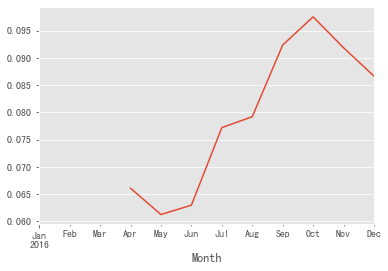

In [58]:
(back_status.sum()/back_status.count()).plot()

由上图可知：90天内回购率，即90天内重复购买率在10%以下，说明目前商店处于用户获取模式，然而由前面分析可知，新用户获取呈下降趋势，目前商店并不健康，当前阶段应当将重心放在新用户获取上。

## 6.商品关联规则挖掘¶
(1)分析热销商品

<BarContainer object of 10 artists>

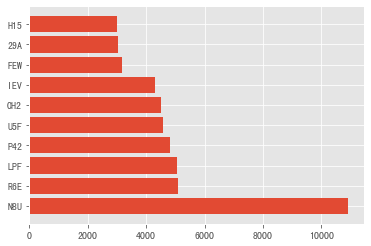

In [59]:
#取出销量排名前10的商品类型
hot_category = df.groupby('SKU_Category').count().Sales_Amount.sort_values(ascending=False)[:10].reset_index()
plt.barh(hot_category.SKU_Category, hot_category.Sales_Amount)

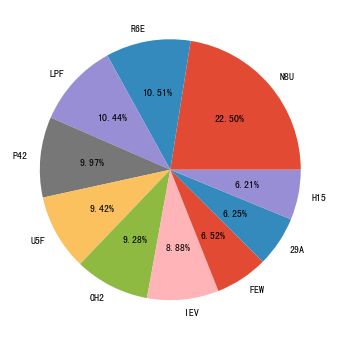

In [60]:
#热销商品占比
hot_category['percent'] = hot_category.Sales_Amount.apply(lambda x:x/hot_category.Sales_Amount.sum())
plt.figure(figsize=(6,6))
plt.pie(hot_category.percent,labels=hot_category.SKU_Category,autopct='%1.2f%%')
plt.show()

In [61]:
category_list = df.groupby('Transaction_ID').SKU_Category.apply(list).values.tolist()

In [63]:
from apyori import apriori

In [64]:
min_support_value = 0.02
min_confidence_value = 0.3
result = list(apriori(transactions=category_list, min_support=min_support_value, min_confidence=min_confidence_value, min_left=0))

In [65]:
result

[RelationRecord(items=frozenset({'LPF', 'FU5'}), support=0.02067035651340404, ordered_statistics=[OrderedStatistic(items_base=frozenset({'FU5'}), items_add=frozenset({'LPF'}), confidence=0.4946355900850906, lift=6.8819142262602355)]),
 RelationRecord(items=frozenset({'IEV', 'LPF'}), support=0.031152407161188583, ordered_statistics=[OrderedStatistic(items_base=frozenset({'IEV'}), items_add=frozenset({'LPF'}), confidence=0.4889589905362776, lift=6.802935131397615), OrderedStatistic(items_base=frozenset({'LPF'}), items_add=frozenset({'IEV'}), confidence=0.43342654334265435, lift=6.802935131397614)]),
 RelationRecord(items=frozenset({'LPF', 'OXH'}), support=0.020067406697381034, ordered_statistics=[OrderedStatistic(items_base=frozenset({'OXH'}), items_add=frozenset({'LPF'}), confidence=0.4810971089696071, lift=6.693551990185444)])]

由上结果可得：

- ‘FU5’-->‘LPF’:支持度为约2.1%，置信度约为49.5%。说明同时购买这两类商品发生的可能性为约2.1%，先购买FU5类型产品后，同时购买LPF类型产品的概率为49.5%
- ‘IEV’-->‘LPF’：支持度约为3.1%，置信度约为48.9%。说明同时购买这两类商品发生的可能性约为3.1%，先购买IEV类型产品后，同时购买LPF类型产品的概率约为48.9%
- ‘LPF’-->‘IEV’：支持度约为3.1%，置信度约为43.3%。说明同时购买这两类商品发生的可能性约为3.1%，先购买LPF类型产品后，同时购买IEV类型产品的概率约为43.3%
- ‘OXH’-->‘LPF’：支持度约为2.0%，置信度约为48.1%。说明同时购买这两类商品发生的可能性约为2.0%，先购买IEV类型产品后，同时购买LPF类型产品的概率约为48.1%